# Geometric Operation
- Transformation
   - ***f(y,x)***: y: vertical direction; x: horizontal direction
   - f(y,x)→`transformation`→g(y',x')

- Scaling
   - reshape the image, we shrink or expand the image in a vertical or horizontal direction
     - f(y,x)→`Scaling: x'=ax`→ g(y',x')
     - f(y,x)→`Scaling: y'=dy`→ g(y',x')
   - **Interpolation**: use *neighbouring pixels* to determine the value of unknown pixel 
   - **Translation**: where we *shift* image
      - Horizontally Shift: `x'= x + t_x`
      - Vertically Shift: `y'= y + t_y`
   - `x'=ax + t_x` and `y'=dy + t_y` → use **affine transformation matrix** express it
   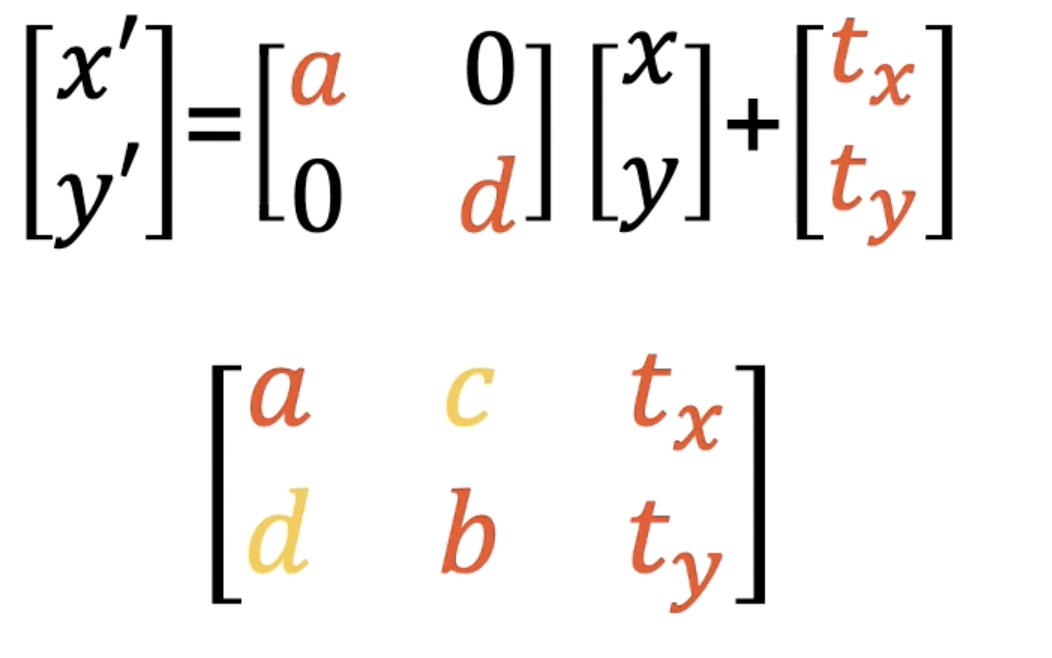
   
- Rotation
   - rotate the image by angle theta, use the rotation matrix
with the counter-clockwise rotation
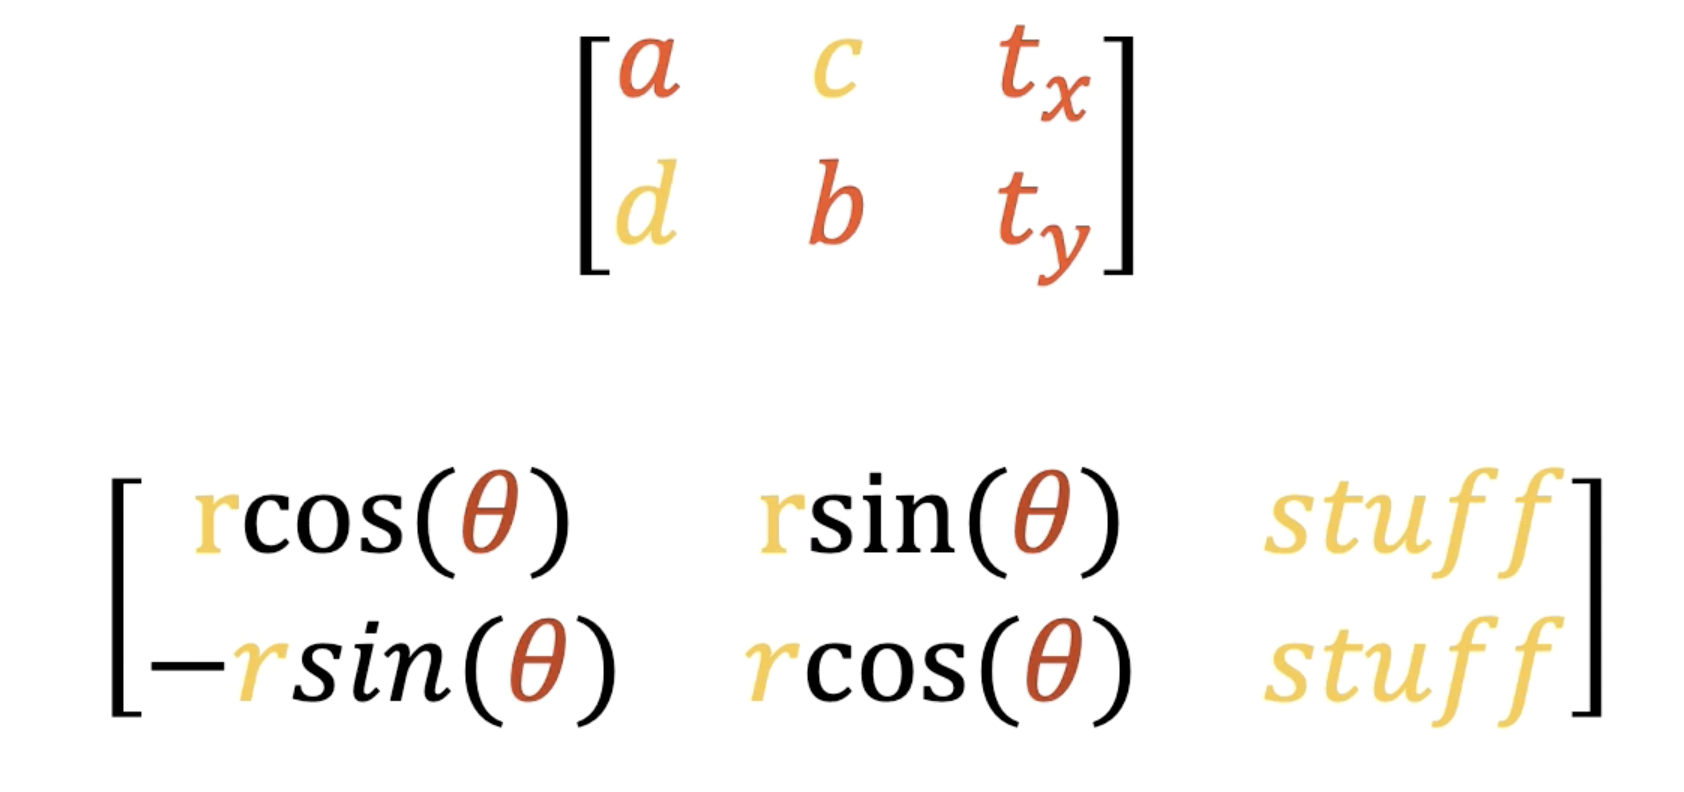




  - Code model:

PIL:

  `image=Image.open('lenna.png')`

  `width=512`

  `hight=512`

  `new_width=2*width`

  `new_hight= hight`

  `new_image=image_resize((new_width,new_hight))`
  #for rotation:

  `theta=45`

  `new_image=image.rotate(theta)`

-----------------------------
OpenCV:

  `import cv2`

  `image=cv2.imread('lenna.png')`

  `new_img=cv2.resize((image,None,fx=2,fy=1,interpolation=cv2.INTER_CUBIC)`
  #`INTER_NEAREST` uses the *nearest* pixel, `INTER_CUBIC` uses *several pixels near* the pixel value we would like to estimate.
   #translation: require Affine Transformation Matrix M

  `rows,cols,_=image.shape`

  `tx=100` # the number of pixels shift the location in horizontal direction

  `ty=0`  # the number of pixels shift the location in vertical direction

  `M=np.float32([[1,0,tx],[0,1,ty]])` #leave the scale factor as 1

  `new_img=cv2.warpAffine(image,M,(cols,rows))` #we put the image and matrix in the warpAffine function, also put the shape of the output image
   #for rotation:angle:Positive values mean counter-clockwise rotation,the coordinate origin is assumed to be the top-left corner

  `theta=45.0`

  `M=cv2.getRotationMatrix2D(center=(cols//2-1,rows//2-1),angle=theta, scale=1)`

  `new_img=cv2.warpAffine(image,M,(cols,rows))`


In [46]:
#import the image from cloud
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

--2022-09-16 00:54:51--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 637192 (622K) [image/png]
Saving to: ‘baboon.png’

baboon.png          100%[===================>] 622.26K   514KB/s    in 1.2s    

2022-09-16 00:54:53 (514 KB/s) - ‘baboon.png’ saved [637192/637192]

--2022-09-16 00:54:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-co

In [2]:
#import the py-package we use
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [39]:
#define a function to plot graphs side by side, we will use it afterwards
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

# 1. Pillow 

# Geometric Transformations
Resize the image use `resize` function changing width and height

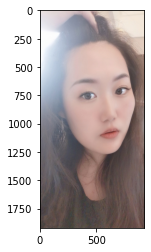

In [18]:
DW = Image.open("DorisWang.png")
plt.imshow(DW)
plt.show()

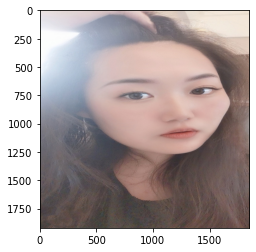

In [19]:
width, height = DW.size
new_width = 2 * width
new_hight = height
new_img = DW.resize((new_width, new_hight))
plt.imshow(new_img)
plt.show()

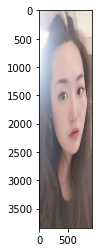

In [20]:
new_width = width
new_hight = 2 * height
new_img = DW.resize((new_width, new_hight))
plt.imshow(new_img)
plt.show()

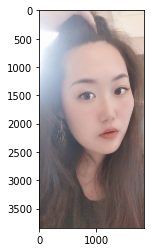

In [21]:
new_width = 2 * width
new_hight = 2 * height
new_img = DW.resize((new_width, new_hight))
plt.imshow(new_img)
plt.show()

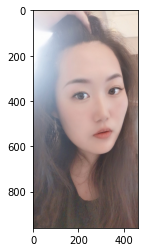

In [24]:
#shrink the image's width and height by 1/2
new_width = width // 2
new_hight = height // 2

new_img = DW.resize((new_width, new_hight))
plt.imshow(new_img)
plt.show()

# Rotation

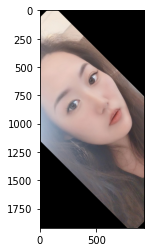

In [22]:
theta=45
new_img=DW.rotate(theta)
plt.imshow(new_img)
plt.show()

# Mathematic Operation

# Array Operation

Add a contrast to each pixel's intensity value.

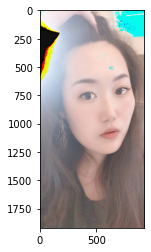

In [27]:
#use numpy convert photo into array
DW = np.array(DW)
#add contrast to image array
new_img = DW + 20
plt.imshow(new_img)
plt.show()

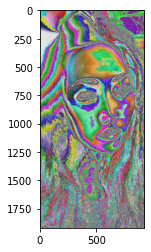

In [28]:
#multiply every pixel's intensity value by a constant value.
new_image = 10 * DW
plt.imshow(new_image)
plt.show()

In [29]:
#generate an array of random noises with the same shape and data type as our image.
Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
Noise.shape

(1920, 924, 3)

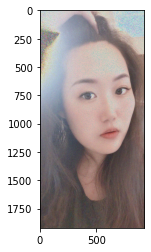

In [30]:
#the values of generated noises added that have corrupted the image
new_img = DW + Noise
plt.imshow(new_img)
plt.show()

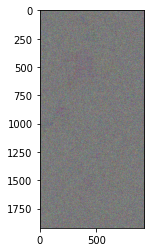

In [31]:
#multiply the elements of two arrays of equal shape
new_image = DW*Noise
plt.imshow(new_image)
plt.show()

# Matrix Operation

- greyscale images are metrices

In [32]:
from PIL import ImageOps 
#the barbara.png is greyscale img
img_gray = Image.open("barbara.png")
#even though the color is grey, it still has three channels, we convert it into one channel use grayscale function
img_gray = ImageOps.grayscale(img_gray)

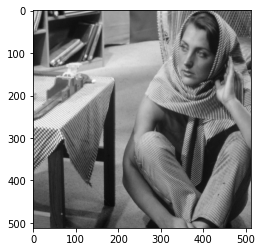

In [34]:
#convert PIL image to a numpy array
img_gray=np.array(img_gray)
plt.imshow(img_gray,cmap='gray')
plt.show()

- 🌟 Use `Singular Value Decomposition` to decompose our  image matrix into three matrices production.

In [35]:
U,s,V=np.linalg.svd(img_gray,full_matrices=True)

In [36]:
#check the shape of s
s.shape #the result shows it not a rectangle

(512,)

In [37]:
#we convert s to a diagonal matrix S:
S=np.zeros((img_gray.shape[0],img_gray.shape[1]))
S[:image.shape[0],:image.shape[0]]=np.diag(s)

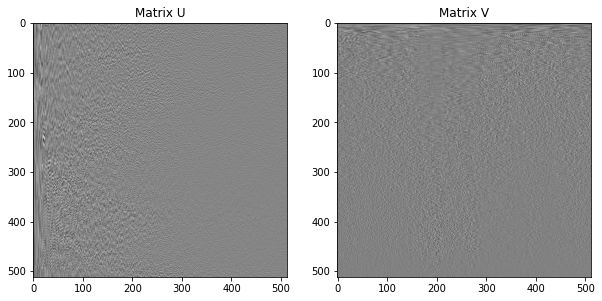

In [42]:
#plot the matrix U and V:
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")

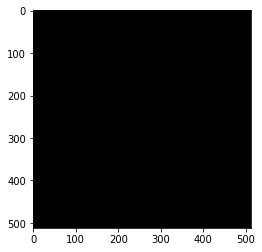

In [43]:
#plot matrix S
plt.imshow(S, cmap='gray')
plt.show() #the elements of S are zero

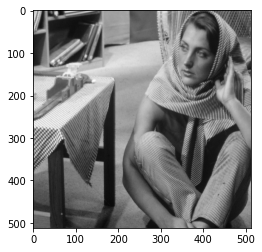

In [44]:
#find the product of all three matrices
#we set the multiplication of matrices S and V to B
B = S.dot(V)
#find the U and B(S*V) multiplication set into A
A=U.dot(B)
plt.imshow(A,cmap='gray')
plt.show()

- Eliminate some rows and columns of S and V and approximate the image by finding its products A

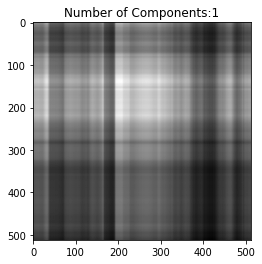

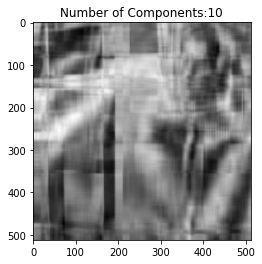

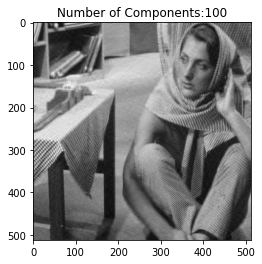

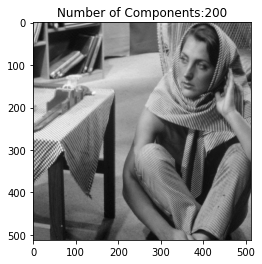

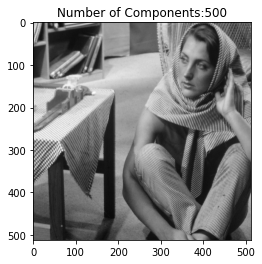

In [45]:
for n_component in [1,10,100,200, 500]:        #set different components of S,V
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]

    A = U.dot(S_new.dot(V_new))
    
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()

Conculsion: Only **100 to 200 Components** to represent the image is necessarily needed.

# 2. OpenCV

In [47]:
import cv2

# Geometric Transformations
# Scaling

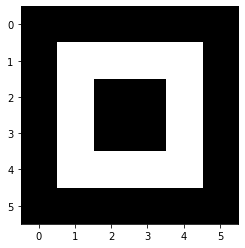

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [48]:
#set up a toy image for example
toy_image = np.zeros((6,6))
toy_image[1:5,1:5]=255
toy_image[2:4,2:4]=0
plt.imshow(toy_image,cmap='gray')
plt.show()
toy_image

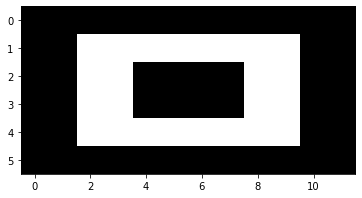

In [49]:
#parameter interpolation
new_toy = cv2.resize(toy_image,None,fx=2, fy=1, interpolation = cv2.INTER_NEAREST )
plt.imshow(new_toy,cmap='gray')
plt.show()

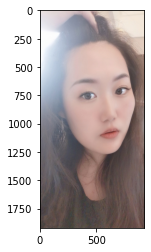

In [51]:
DW = cv2.imread("DorisWang.png")
plt.imshow(cv2.cvtColor(DW, cv2.COLOR_BGR2RGB))
plt.show()

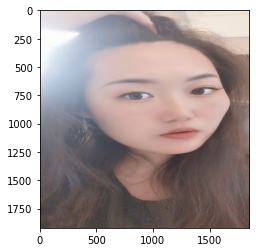

old image shape: (1920, 924, 3) new image shape: (1920, 1848, 3)


In [52]:
#scale the horizontal axis by two and leave the vertical axis as the original one
new_img = cv2.resize(DW, None, fx=2, fy=1, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", DW.shape, "new image shape:", new_img.shape)

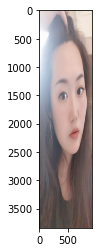

old image shape: (1920, 924, 3) new image shape: (3840, 924, 3)


In [53]:
#scale the vertical axis by two and leave the horizontal axis as the original one
new_img = cv2.resize(DW, None, fx=1, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", DW.shape, "new image shape:", new_img.shape)

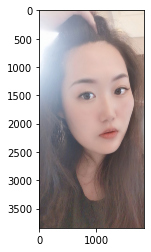

old image shape: (1920, 924, 3) new image shape: (3840, 1848, 3)


In [54]:
#scale the vertical/horizontal axis by two
new_img = cv2.resize(DW, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", DW.shape, "new image shape:", new_img.shape)

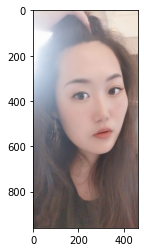

old image shape: (1920, 924, 3) new image shape: (960, 462, 3)


In [55]:
#scale the vertical/horizontal axis by 1/2
new_img = cv2.resize(DW, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", DW.shape, "new image shape:", new_img.shape)

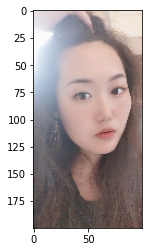

old image shape: (1920, 924, 3) new image shape: (200, 100, 3)


In [56]:
#specify the number of rows and columns
new_img = cv2.resize(DW, (100, 200), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()
print("old image shape:", DW.shape, "new image shape:", new_img.shape)

# Translation:
- shift the location of the image

In [61]:
#shift the image 150 pixels horizontally
tx = 250
ty = 0
M = np.float32([[1, 0, tx], [0, 1, ty]])
M

array([[  1.,   0., 250.],
       [  0.,   1.,   0.]], dtype=float32)

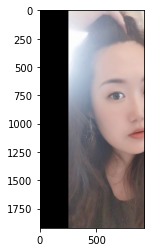

In [62]:
rows, cols, _ = DW.shape
new_img = cv2.warpAffine(DW, M, (cols, rows))
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

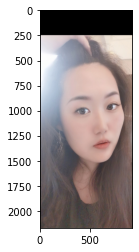

In [64]:
#similarly,shift the image horizontally
tx = 0
ty = 250
M = np.float32([[1, 0, tx], [0, 1, ty]])
new_img = cv2.warpAffine(DW, M, (cols + tx, rows + ty))
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

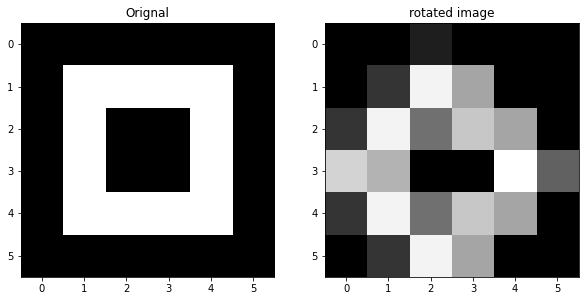

In [66]:
#rotate our toy image with 45 degree,use getRotationMatrix2D function
theta = 45.0
M = cv2.getRotationMatrix2D(center=(3, 3), angle=theta, scale=1)
new_toy_image = cv2.warpAffine(toy_image, M, (6, 6))

plot_image(toy_image, new_toy_image, title_1="Orignal", title_2="rotated image")

In [67]:
#the intensity values of after-rotation toy image
new_toy_image 

array([[  0.        ,   0.        ,  28.38867188,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [195.234375  , 165.10253906,   0.        ,   0.        ,
        234.82910156,  89.89746094],
       [ 47.8125    , 223.125     , 103.59375   , 183.28125   ,
        151.40625   ,   0.        ],
       [  0.        ,  47.8125    , 223.125     , 151.40625   ,
          0.        ,   0.        ]])

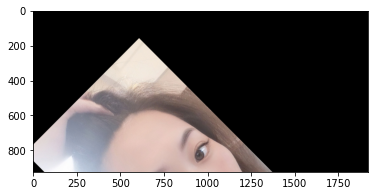

In [68]:
cols, rows, _ = DW.shape
M = cv2.getRotationMatrix2D(center=(cols // 2 - 1, rows // 2 - 1), angle=theta, scale=1)
new_img = cv2.warpAffine(DW, M, (cols, rows))
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

# Mathematic Operation

# Array Operation

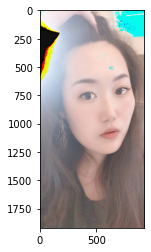

In [69]:
# add a constant to each pixel's intensity value
new_img = DW + 20
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

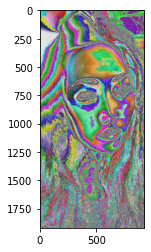

In [70]:
#multiply every pixel's intensity value by a constant value.
new_img = 10 * DW
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()